# Model building excercise

Model building for prediction of Severity of a collision.

**Note:** Some of the code is taken from the Visualization excercise, and hence not annotated.

** Selected Model ** : GradientBoostedClassifier

The gradient boosted classifier provided the below metrics
Configuration: n_estimators=350, learning_rate= 0.01, max_depth=6 
********** REPORT *************

Confusion Matrix:

classes:

cls  1    2    3
[[   1    4    7]
 [   4   52  116]
 [   4   97 1550]]

Accuracy:  0.873569482289

Recall:  0.873569482289

Also it scored 90.03 on kaggle leaderboard.


## Importing Packages

In [1]:
# Import the required packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.metrics import recall_score, confusion_matrix, accuracy_score
from sklearn.metrics import precision_score

%matplotlib inline

## Reading & Preprocessing Data

In [2]:
# Function to preprocess input data
def preprocess(file):
    df = pd.read_csv(file, encoding="ISO-8859-1")
    df.columns = ["_".join(x.split(" ")) for x in df.columns]
    df.Speed_Limit = df.Speed_Limit.fillna(df.Speed_Limit.mean())
    df = df.fillna(df.mode().iloc[0])

    le_PA = preprocessing.LabelEncoder()
    le_WD = preprocessing.LabelEncoder()
    le_PA.fit(list(df.Policing_Area.unique()))
    le_WD.fit(["MON", "TUE", "WED", "THU", "FRI", "SAT", "SUN"])
    df.Policing_Area = le_PA.transform(df.Policing_Area)
    df.Weekday_of_Collision = le_WD.transform(df.Weekday_of_Collision)
    # Convert floats to int

    df["Hour_of_Collision_(24_hour)"] = df["Hour_of_Collision_(24_hour)"].astype(int)
    df.Junction_Detail = df.Junction_Detail.astype(int)
    df.Junction_Control = df.Junction_Control.astype(int)
    df["Pedestrian_Crossing__Human_Control"]= df["Pedestrian_Crossing__Human_Control"].astype(int)
    df["Pedestrian_Crossing__Physical_Control"] = df["Pedestrian_Crossing__Physical_Control"].astype(int)
    df.Road_Surface_Conditions = df.Road_Surface_Conditions.astype(int)
    df.Special_Conditions_at_Site = df.Special_Conditions_at_Site.astype(int)
    return df

# Function to create a submission
def create_submission(testdf, Y_pred, filename):
    sub = pd.DataFrame()
    sub["Collision Reference No."] = testdf["Collision_Reference_No."]
    sub["Collision Severity"] = Y_pred
    sub.to_csv(filename, index=False)
    
traindf = preprocess("data/train_PHD.csv")
valdf = preprocess("data/validation_PHD.csv")

testdf = preprocess("data/test_NoTarget_PHD.csv")

## Data Splitting

Split the data in to 'Dependent' and 'Independent', Features and lables.
So that once we have the data split in place later we can try multiple models on it.

In [3]:
# Features selected for training of a model
inpcols = [ 
     'Policing_Area',
#      'Weekday_of_Collision',
     'Day_of_Collision',
     'Month_of_Collision',
     'Hour_of_Collision_(24_hour)',
     'Carriageway_Type',
     'Speed_Limit',
     'Junction_Detail',
#      'Junction_Control',
     'Pedestrian_Crossing_\x96_Human_Control',
     'Pedestrian_Crossing_\x96_Physical_Control',
     'Light_Conditions',
     'Weather_Conditions',
     'Road_Surface_Conditions',
     'Special_Conditions_at_Site'
]

opcol = "Collision_Severity"

# Train data X = Features, y = Label
X = traindf[inpcols]
y = traindf[opcol]

# Validation data Xv = Features of val dataset, yv = Labels of val dataset
Xv = valdf[inpcols]
yv = valdf[opcol]

# Test data on which we have to build the submission
X_test = testdf[inpcols]

# Binning of speed limit into 1, 2, 3. 1 -> [10, 15, 20], 2 -> [30, 40, 50], 3 -> [60, 65, 70]
# X.Speed_Limit = X.Speed_Limit.map(lambda x: 1 if x in [10, 15, 20] else 2 if x in [30, 40, 50] else 3)
# Xv.Speed_Limit = Xv.Speed_Limit.map(lambda x: 1 if x in [10, 15, 20] else 2 if x in [30, 40, 50] else 3)

# Utility Functions

In [4]:
# Function to print the metrics for a given prediction eg. Accuracy, Recall, Precision
def print_report(yv, yv_pred):
    print("********** REPORT *************")
    print("Confusion Matrix:")
    print("classes:")
    print("cls  1    2    3")
    print(confusion_matrix(yv, yv_pred))
    print("Accuracy: ", accuracy_score(yv, yv_pred))
    print("Recall: ", recall_score(yv, yv_pred, average="weighted"))
    print("Precision: ", precision_score(yv, yv_pred, average="weighted"))

# Logistic Regresstion

Simplest model to try on any classification problem

In [5]:
from sklearn.linear_model import LogisticRegression

print("Class Labels:")
print(yv.value_counts())

for C in [100, 1, 0.01]:
    for p in ["l1", "l2"]:
        clf = LogisticRegression(C=C, penalty=p, tol=0.01)
        clf.fit(X, y)
        yv_pred = clf.predict(Xv)
        print("\n\nFor value of C=", C, "and Loss Function p=", p)
        print_report(yv, yv_pred)

Class Labels:
3    1651
2     172
1      12
Name: Collision_Severity, dtype: int64


For value of C= 100 and Loss Function p= l1
********** REPORT *************
Confusion Matrix:
classes:
cls  1    2    3
[[   0    0   12]
 [   0    0  172]
 [   0    0 1651]]
Accuracy:  0.899727520436
Recall:  0.899727520436
Precision:  0.80950961103


For value of C= 100 and Loss Function p= l2
********** REPORT *************
Confusion Matrix:
classes:
cls  1    2    3
[[   0    0   12]
 [   0    0  172]
 [   0    0 1651]]
Accuracy:  0.899727520436
Recall:  0.899727520436
Precision:  0.80950961103


For value of C= 1 and Loss Function p= l1
********** REPORT *************
Confusion Matrix:
classes:
cls  1    2    3
[[   0    0   12]
 [   0    0  172]
 [   0    0 1651]]
Accuracy:  0.899727520436
Recall:  0.899727520436
Precision:  0.80950961103


/Users/kaustubhn/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)




For value of C= 1 and Loss Function p= l2
********** REPORT *************
Confusion Matrix:
classes:
cls  1    2    3
[[   0    0   12]
 [   0    0  172]
 [   0    0 1651]]
Accuracy:  0.899727520436
Recall:  0.899727520436
Precision:  0.80950961103


For value of C= 0.01 and Loss Function p= l1
********** REPORT *************
Confusion Matrix:
classes:
cls  1    2    3
[[   0    0   12]
 [   0    0  172]
 [   0    0 1651]]
Accuracy:  0.899727520436
Recall:  0.899727520436
Precision:  0.80950961103


For value of C= 0.01 and Loss Function p= l2
********** REPORT *************
Confusion Matrix:
classes:
cls  1    2    3
[[   0    0   12]
 [   0    0  172]
 [   0    0 1651]]
Accuracy:  0.899727520436
Recall:  0.899727520436
Precision:  0.80950961103


# Decision Trees

Lets build a classifer based on decision trees.

In [6]:
from sklearn import tree

clf = tree.DecisionTreeClassifier(max_depth=7, random_state=1234, criterion="gini", splitter="best")
clf.fit(X, y)
yv_pred = clf.predict(Xv)
print_report(yv, yv_pred)

********** REPORT *************
Confusion Matrix:
classes:
cls  1    2    3
[[   1    3    8]
 [   2   30  140]
 [   0   29 1622]]
Accuracy:  0.900817438692
Recall:  0.900817438692
Precision:  0.872030566178


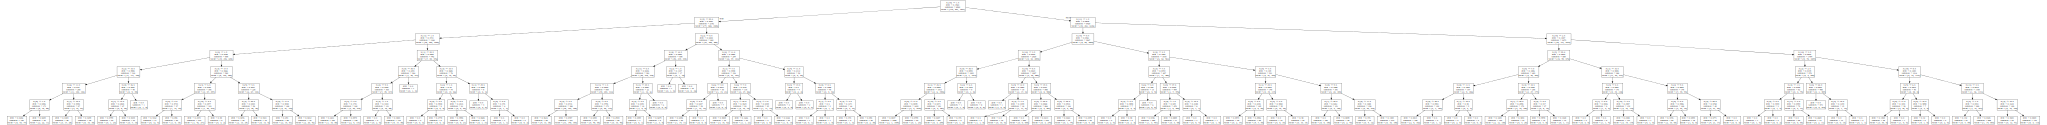

In [7]:
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None)
graph = graphviz.Source(dot_data)

# Visual Representation of the decision tree
graph # Uncomment to view visual tree in notebook

# Support Vector Machines

Build a svm model to classify the severity of the collision

In [10]:
from sklearn import svm

# Types of kernals available
# kernals = ["linear", "poly", "rbf", "sigmoid", "precomputed"]
clf = svm.SVC(kernel="rbf", class_weight="balanced", degree=2)
clf.fit(X, y)
yv_pred = clf.predict(Xv)
print_report(yv, yv_pred)

********** REPORT *************
Confusion Matrix:
classes:
cls  1    2    3
[[   0    0   12]
 [   0   12  160]
 [   4   43 1604]]
Accuracy:  0.880653950954
Recall:  0.880653950954
Precision:  0.833042576885


# Ensemble Methods

# Random Forest

In [11]:
from sklearn.ensemble import RandomForestClassifier

# clf = RandomForestClassifier(n_estimators=50, class_weight={1: 10, 2: 10, 3: 1})
clf = RandomForestClassifier(n_estimators=300)
clf.fit(X, y)
yv_pred = clf.predict(Xv)
print_report(yv, yv_pred)

# Generate submission file uncomment below lines
# Y_pred = clf.predict(X_test)
# create_submission(testdf, Y_pred,"submission_1_rf.csv")

********** REPORT *************
Confusion Matrix:
classes:
cls  1    2    3
[[   0    0   12]
 [   0   17  155]
 [   0   22 1629]]
Accuracy:  0.897002724796
Recall:  0.897002724796
Precision:  0.856924849262


/Users/kaustubhn/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Gradient Boosting

In [12]:
from sklearn.ensemble import GradientBoostingClassifier

# Best till now n_estimators=350, lr= 0.01, max_depth=6 # 91.33, 91.33, 88.9
clf = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, max_depth=None, random_state=123)
clf.fit(X, y)
yv_pred = clf.predict(Xv)
print_report(yv, yv_pred)

# Generate submission file uncomment below lines
# Y_pred = clf.predict(X_test)
# create_submission(testdf, Y_pred, "submission_2_gbc.csv")

********** REPORT *************
Confusion Matrix:
classes:
cls  1    2    3
[[   1    3    8]
 [   3   49  120]
 [   4  102 1545]]
Accuracy:  0.869209809264
Recall:  0.869209809264
Precision:  0.861531594852


# AdaBoost

In [13]:
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier(n_estimators=500, learning_rate=0.001)
clf.fit(X,y)
yv_pred = clf.predict(Xv)
print_report(yv, yv_pred)

********** REPORT *************
Confusion Matrix:
classes:
cls  1    2    3
[[   0    0   12]
 [   0    0  172]
 [   0    0 1651]]
Accuracy:  0.899727520436
Recall:  0.899727520436
Precision:  0.80950961103


/Users/kaustubhn/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Bagging

In [14]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier

clf = tree.DecisionTreeClassifier(max_depth=8, random_state=1234, class_weight={0: 10, 1: 8, 2:1})
bagging = BaggingClassifier(clf, max_samples=0.5, max_features=0.5)
bagging.fit(X, y)
yv_pred = bagging.predict(Xv)
print_report(yv, yv_pred)

********** REPORT *************
Confusion Matrix:
classes:
cls  1    2    3
[[   0    6    6]
 [   0   87   85]
 [   0  182 1469]]
Accuracy:  0.84795640327
Recall:  0.84795640327
Precision:  0.876897118322


/Users/kaustubhn/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Pattern Extraction
Extract patterns based on the decision tree rules

**Note**: This extraction will run only on decision tree model, make sure you run decision tree model before running the below function.

In [8]:

# Function to extract rules from decision trees.
def print_decision_tree(tree, feature_names=None, offset_unit='    '):
    '''Plots textual representation of rules of a decision tree
    tree: scikit-learn representation of tree
    feature_names: list of feature names. They are set to f1,f2,f3,... if not specified
    offset_unit: a string of offset of the conditional block'''

    left      = tree.tree_.children_left
    right     = tree.tree_.children_right
    threshold = tree.tree_.threshold
    value = tree.tree_.value
    if feature_names is None:
        features  = ['f%d'%i for i in tree.tree_.feature]
    else:
        features  = [feature_names[i] for i in tree.tree_.feature]        

    def recurse(left, right, threshold, features, node, depth=0):
            offset = offset_unit*depth
            if (threshold[node] != -2):
                    print(offset+"if ( " + features[node] + " <= " + str(threshold[node]) + " ) {")
                    if left[node] != -1:
                            recurse (left, right, threshold, features,left[node],depth+1)
                    print(offset+"} else {")
                    if right[node] != -1:
                            recurse (left, right, threshold, features,right[node],depth+1)
                    print(offset+"}")
            else:
                    print(offset+"return " + str(value[node]))

    recurse(left, right, threshold, features, 0,0)

In [9]:
# Note run DT model before executing this cell
print_decision_tree(clf, feature_names=list(X.columns))

if ( Weather_Conditions <= 1.5 ) {
    if ( Speed_Limit <= 55.0 ) {
        if ( Road_Surface_Conditions <= 1.5 ) {
            if ( Light_Conditions <= 1.5 ) {
                if ( Month_of_Collision <= 10.5 ) {
                    if ( Junction_Detail <= 11.0 ) {
                        if ( Pedestrian_Crossing__Physical_Control <= 1.5 ) {
                            return [[  6.  53.  77.]]
                        } else {
                            return [[  2.  22.  11.]]
                        }
                    } else {
                        if ( Day_of_Collision <= 16.5 ) {
                            return [[  3.  17.  28.]]
                        } else {
                            return [[  0.  10.  39.]]
                        }
                    }
                } else {
                    if ( Policing_Area <= 36.5 ) {
                        if ( Day_of_Collision <= 12.5 ) {
                            return [[  0.   1.  23.]]
                        